# Drag Race Philippines Sentiment Analysis

##### *GROUP 7*
Gozon, Jean Pauline <br>
Jamias, Gillian Nicole <br>
Reyes, Anton Gabriel

# Importing Libraries

In [44]:
#libraries that might have to be installed just in case

#!pip install spacy
#!pip install wordcloud
#!python -m spacy download en_core_web_sm

In [45]:
#Importing Libraries

import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
import spacy
import en_core_web_sm
from wordcloud import WordCloud, STOPWORDS

sns.set_theme(style='darkgrid')

%matplotlib inline

# Dataset Description

The two datasets contain Tweets related to the Philippine franchise of RuPaul’s Drag Race, Drag Race Philippines. These two datasets have Tweets with contestant-specific hashtags for the winner Precious Paula Nicole **(PPN)** and runner-up Marina Summers **(MS)**. These also contain the date, hour, text in the tweets, and hashtags present as well. 

## Data Collection
These datasets were collected with the following process:


1.   We first signed up for a Twitter Developer API and applied for Elevated Access with Anton's account
2.   After that, we began to get the tokens and creating cells of code to retrieve Tweets within a 7-day period using the hashtags #TeamPreciousPaulaNicole and #TeamMarinaSummers. 
3. The same process was repeated to gain the Tweets per day, twice (as we needed data for both PPN and MS)
4. After the multiple data frames were created, the data frames were concatenated into one data frame and saved as two CSVs: One for **PPN** (Precious Paula Nicole) and **MS** (Marina Summers)
6. Lastly, the indivudal dataframes per day we also saved as indivisual CSVs as backup. 

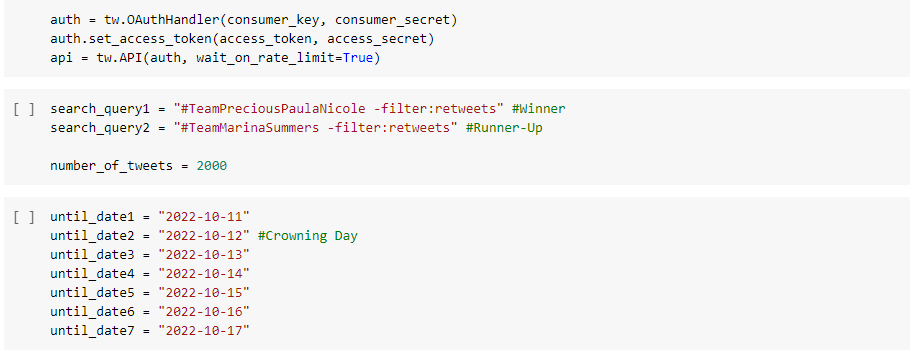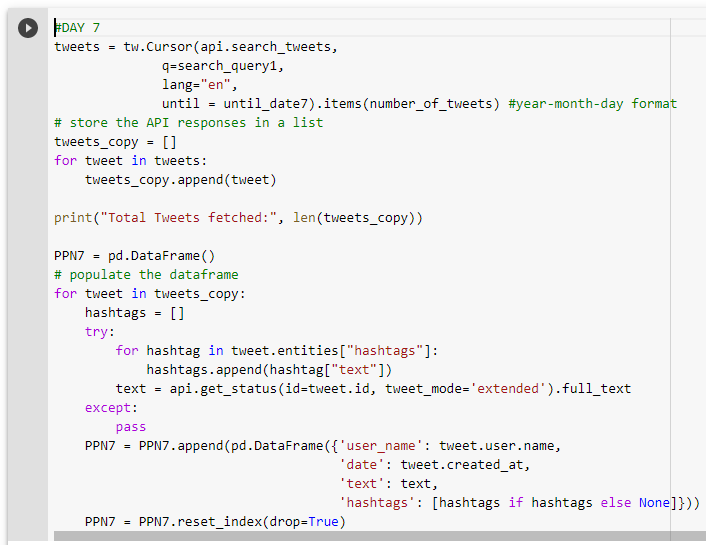

## Data Dictionary

| Column | Data Type | Description |
| --- | --- | --- |
|user_name|string|Username of the account that Tweeted|
|*date*|datetime64|Date and Time of when the Tweet was published|
|text|string|Contains the text of the Tweet itself|
|hashtags|string|Contains the hashtags that can be found in the Tweet|
|Date|datetime64|Date of when the Tweet was published|
|Time|string|Time of when the Tweet was published|



Note: the `Date` and `Time` columns are added to the dictionary above due to the cleaning.

## Problems and Implications
As for the collection, there weren't a lot of major challenges. 

However, it did take the group to improve on some lines of code when it came to running the said request as they had "Unknown Parameters" as a result when running a cell. This however, was fixed after thoroughly studying the documentation while testing the Tweepy Library and Twitter API. 

The previous tweets from the first data frames got saved with the succeeding data frame, thus, a running total. To resolve the problem of duplicate tweets being created from the previous days, we decided to use the last day or day 7. 

Another implication was something that the group expected: Rate limit and sleeping.

## Importing the CSVs

In [46]:
#importing csvs

MS = pd.read_csv('MS7.csv') 
PPN = pd.read_csv('PPN7.csv') 

In [47]:
display(PPN.info(), MS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_name  853 non-null    object
 1   date       853 non-null    object
 2   text       853 non-null    object
 3   hashtags   719 non-null    object
dtypes: object(4)
memory usage: 26.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_name  617 non-null    object
 1   date       617 non-null    object
 2   text       617 non-null    object
 3   hashtags   556 non-null    object
dtypes: object(4)
memory usage: 19.4+ KB


None

None

# Data Cleaning

## Formatting
Originally, the columns in the dataset were all `objects` and the `date` column was unusable. Because of this, the column was converted to the `datetime64` format as well as added to a new column named `Date` and `Time`.

In [48]:
#converting the date column from object to datetime
PPN['date'] = pd.to_datetime(PPN['date'])
MS['date'] = pd.to_datetime(MS['date'])

#getting the YYYY-MM-DD from the date column
PPN['Date'] = PPN['date'].dt.date
MS['Date'] = MS['date'].dt.date

#getting the HH:MM:SS from the date column
PPN['Time'] = PPN['date'].dt.time
MS['Time'] = MS['date'].dt.time

#converting the Date columns to datetime64
PPN['Date'] = pd.to_datetime(PPN['Date'])
MS['Date'] = pd.to_datetime(MS['Date'])

#converting object column to strings
PPN[['user_name','text','hashtags','Time']] = PPN[['user_name','text','hashtags','Time']].astype('string')
MS[['user_name','text','hashtags','Time']] = MS[['user_name','text','hashtags','Time']].astype('string')

In [49]:
display(PPN.info(), MS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_name  853 non-null    string             
 1   date       853 non-null    datetime64[ns, UTC]
 2   text       853 non-null    string             
 3   hashtags   719 non-null    string             
 4   Date       853 non-null    datetime64[ns]     
 5   Time       853 non-null    string             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), string(4)
memory usage: 40.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_name  617 non-null    string             
 1   date       617 non-null    datetime64[ns, UTC]
 2   text       617 non-null    string             
 3   hashtags   556 non-null    s

None

None

## Concatenating the Dataframe

In [50]:
frames = [PPN, MS]
master = pd.concat(frames)
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 616
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_name  1470 non-null   string             
 1   date       1470 non-null   datetime64[ns, UTC]
 2   text       1470 non-null   string             
 3   hashtags   1275 non-null   string             
 4   Date       1470 non-null   datetime64[ns]     
 5   Time       1470 non-null   string             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), string(4)
memory usage: 80.4 KB


In [51]:
master.value_counts('text').sum()

1470

## Duplicates in the Datasets

There were multiple duplicates found in the `user_name` column for both datasets. Additionally, the text with certain 

In [52]:
#using the master df to get all the information
master_un = pd.DataFrame(master[['user_name']].value_counts())
master_un_dup = master_un.loc[master_un [0] >= 2] #getting usernames that show up that are more than or equal to 2

master_un_dup

,0
user_name,
PRN Booster,31
Lovi Poe-la Nicole | baby ni Boss Rodolfo,17
alyssa,15
AC | Precious PANALO NA Nicole 👑💖,15
kakaibabe mani ❤️,14
...,...
𝖆𝖘𝖍𝖑𝖊𝖞,2
ᴛᴏᴍ,2
Franxxs,2


In [53]:
#using the master df to get all the information
master_untext = pd.DataFrame(master[['user_name', 'text']].value_counts()).reset_index()
master_untext.columns = ['user_name', 'text', 'count']
master_untext_dup = master_untext.loc[master_untext ['count'] >= 2] #getting count of duplicates similar to a groupby

master_untext_dup.head()

,user_name,text,count
0,PRN Booster,Learn about the latest from the #UkraineRussia...,9
1,PRN Booster,Learn about important upcoming elections at ht...,6
2,PRN Booster,Learn about important upcoming elections at ht...,4
3,V,Marina didn't win. And PPN crowned. STILL A WI...,2
4,Elaine,I'm so ready for #DragRacePH finale! Lezzgaw #...,2


## Spam Tweets

Upon looking at the datasets, the group have noticed for spam Tweets that used the specified `#Team` hashtags. They concatenated the two dataframe and dropped the rows that included the hashtag `#UkraineRussianWar` and other hashtags.

In [54]:
#dropping of the #UkraineRussianWar hashtags

master_nospam = master[~master.text.str.contains('#UkraineRussianWar')] #removing the spam tweets
master_nospam = master_nospam[~master_nospam.text.str.contains('#HARUTO')] 
master_nospam = master_nospam[~master_nospam.text.str.contains('#TheLegenodofMaulaJatt')] 
master_nospam = master_nospam[~master_nospam.text.str.contains('#JacksonWangWorldTour')] 
master_nospam = master_nospam[~master_nospam.text.str.contains('#COVID19')] 
master_nospam = master_nospam[~master_nospam.text.str.contains('#chainsawman')] 
master_nospam = master_nospam[~master_nospam.text.str.contains('#NFTCommunity')]
master_nospam = master_nospam[~master_nospam.text.str.contains('#cryptomarket')]

#print("Number of Spam Tweets (after dropping):",master_nospam.text.str.count("#UkraineRussianWar").sum())


In [55]:
master_nospam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 616
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_name  1416 non-null   string             
 1   date       1416 non-null   datetime64[ns, UTC]
 2   text       1416 non-null   string             
 3   hashtags   1229 non-null   string             
 4   Date       1416 non-null   datetime64[ns]     
 5   Time       1416 non-null   string             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), string(4)
memory usage: 77.4 KB


In [56]:
master_nospam.value_counts('text').sum()

1416

In [57]:
master.value_counts('text').sum() - master_nospam.value_counts('text').sum() #total number of spam removed

54

In [58]:
UkraineRussianWar_drop = master_nospam['text'].str.count("#UkraineRussianWar") <= 1

In [59]:
sum(UkraineRussianWar_drop)

1416

In [60]:
chainsawman_drop = master_nospam['text'].str.count("#chainsawman") <= 1

In [61]:
sum(chainsawman_drop)

1416

In [62]:
#removing spam tweets in individual datasets

PPN_nospam = PPN[~PPN.text.str.contains('#UkraineRussianWar')] #removing the spam tweets
PPN_nospam = PPN_nospam[~PPN_nospam.text.str.contains('#HARUTO')] #removing the spam tweets
PPN_nospam = PPN_nospam[~PPN_nospam.text.str.contains('#TheLegenodofMaulaJatt')] #removing the spam tweets
PPN_nospam = PPN_nospam[~PPN_nospam.text.str.contains('#JacksonWangWorldTour')] #removing the spam tweets
PPN_nospam = PPN_nospam[~PPN_nospam.text.str.contains('#COVID19')] #removing the spam tweets
PPN_nospam = PPN_nospam[~PPN_nospam.text.str.contains('#chainsawman')] #removing the spam tweets
PPN_nospam = PPN_nospam[~PPN_nospam.text.str.contains('#NFTCommunity')]
PPN_nospam = PPN_nospam[~PPN_nospam.text.str.contains('#cryptomarket')]

MS_nospam = MS[~MS.text.str.contains('#UkraineRussianWar')] #removing the spam tweets
MS_nospam = MS_nospam[~MS_nospam.text.str.contains('#HARUTO')] #removing the spam tweets
MS_nospam = MS_nospam[~MS_nospam.text.str.contains('#TheLegenodofMaulaJatt')] #removing the spam tweets
MS_nospam = MS_nospam[~MS_nospam.text.str.contains('#JacksonWangWorldTour')] #removing the spam tweets
MS_nospam = MS_nospam[~MS_nospam.text.str.contains('#COVID19')] #removing the spam tweets
MS_nospam = MS_nospam[~MS_nospam.text.str.contains('#chainsawman')] #removing the spam tweets
MS_nospam = MS_nospam[~MS_nospam.text.str.contains('#NFTCommunity')]
MS_nospam = MS_nospam[~MS_nospam.text.str.contains('#cryptomarket')]

## Missing Values
Upon looking at both datasets, the group found out that all columns were complete except for the hashtag column. There are some rows or Tweets that had text related a specific hashtag, but did not contain the actual hashtag in the `hashtags` column.

**Example:** A Tweet in the `MS` dataset that contained the name "Marina Summers", but did not include `#TeamMarinaSummers` in the same Tweet. This showed itself as `None`

Or in other cases, some of the Tweets would related to a contestant's name but had irrelevant hastags in the `hashtags` column. 

In [63]:
print("Number of missing values:")
print("PPN:", PPN['hashtags'].isna().sum())
print("MS:", MS['hashtags'].isna().sum())

Number of missing values:
PPN: 134
MS: 61


However, due to the inconsistencies in the `hashtags` column, it has been left alone for now.

# Exploratory Data Analysis

The following are the EDA Questions that the group are asking:

1.   How many features and observations are present?
2.   What is the shape of the dataset?
3.   At what time are the most Tweets Tweeted? 
4.   Out of the 7 days, which day has the most Tweets?
5.   Are there any spam Tweets?
6.   What are the most repeated words in the Tweets?



##How many features and observations are present?

In [64]:
#PPN
print("PPN Rows:",len(PPN))
print("PPN Columns:",len(PPN.columns))

#MS
print("MS Rows:",len(MS))
print("MS Columns:",len(MS.columns))

PPN Rows: 853
PPN Columns: 6
MS Rows: 617
MS Columns: 6


## What is the shape of the dataset?

In [65]:
PPN.describe()

<ipython-input-65-a7d389ae5755>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  PPN.describe()
<ipython-input-65-a7d389ae5755>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  PPN.describe()


,user_name,date,text,hashtags,Date,Time
count,853,853,853,719,853,853
unique,509,847,836,172,6,847
top,PRN Booster,2022-10-12 11:56:19+00:00,Learn about the latest from the #UkraineRussia...,['TeamPreciousPaulaNicole'],2022-10-12 00:00:00,11:56:19
freq,31,3,9,163,654,3
first,NaN,2022-10-10 12:30:33+00:00,NaN,NaN,2022-10-10 00:00:00,NaN
last,NaN,2022-10-16 15:22:53+00:00,NaN,NaN,2022-10-16 00:00:00,NaN


In [66]:
MS.describe()

<ipython-input-66-98915e7ac295>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  MS.describe()
<ipython-input-66-98915e7ac295>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  MS.describe()


,user_name,date,text,hashtags,Date,Time
count,617,617,617,556,617,617
unique,527,611,617,127,6,610
top,✩,2022-10-12 12:00:07+00:00,me watching the #DragRaceFinale @marinaxsummer...,['TeamMarinaSummers'],2022-10-12 00:00:00,12:11:19
freq,8,2,1,242,509,2
first,NaN,2022-10-10 21:47:42+00:00,NaN,NaN,2022-10-10 00:00:00,NaN
last,NaN,2022-10-15 18:02:58+00:00,NaN,NaN,2022-10-15 00:00:00,NaN


In [67]:
print('PPN Shape:', PPN.shape)
#print('PPN_cleaned Shape:', PPN_cleaned.shape)
print('MS Shape:', MS.shape)
#print('MS_cleaned Shape:', MS_cleaned.shape)

PPN Shape: (853, 6)
MS Shape: (617, 6)


## At what time are the most tweets tweeted?

In [68]:
PPN['hour_of_day'] = PPN.date.dt.hour
MS['hour_of_day'] = MS.date.dt.hour

In [69]:
PPN_grp = PPN.drop(columns = 'date')
PPN_grp = PPN_grp.groupby('hour_of_day').count()

MS_grp = MS.drop(columns = 'date')
MS_grp = MS_grp.groupby('hour_of_day').count()

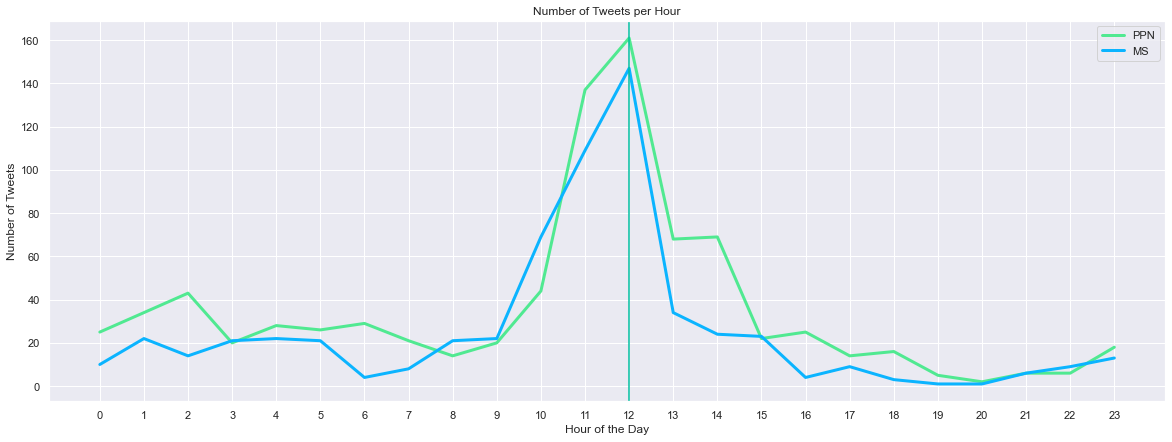

In [70]:
plt.figure(figsize=(20, 7))

plt.plot(PPN_grp['text'], label = "PPN", color = "#50e991", linewidth = 3)
plt.plot(MS_grp['text'], label = "MS", color = "#0bb4ff", linewidth = 3)
plt.axvline(12, color = "#00bfa0")

x = list(range(24))
plt.xticks(x)

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets per Hour")

plt.legend()
plt.show()

*The visualization above shows the hour (regardless of day) of which hour has the most Tweets or active users.*


*In this case, the rise or peak of the Tweets are at 12PM.*

## Out of the 7 days, which day has the most Tweets?

In [71]:
MDY_cols=["Month","Day","Year"] #variable to dictate what columns to merge to make Month-Day-Year column

PPN['Month'] = PPN['date'].dt.strftime("%b")  # %b is for Month name, short version
PPN['Day'] = PPN['date'].dt.strftime("%d") # %d is for Day of month 
PPN['Year'] = PPN['date'].dt.strftime("%Y") # %Y is for Year, full version

PPN['MDY'] = PPN[MDY_cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

MS['Month'] = MS['date'].dt.strftime("%b")
MS['Day'] = MS['date'].dt.strftime("%d")
MS['Year'] = MS['date'].dt.strftime("%Y")

MS['MDY'] = MS[MDY_cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [72]:
PPN_grp_date = PPN.groupby('MDY').count()
MS_grp_date = MS.groupby('MDY').count()

In [73]:
PPN_grp_date

,user_name,date,text,hashtags,Date,Time,hour_of_day,Month,Day,Year
MDY,,,,,,,,,,
Oct-10-2022,32,32,32,24,32,32,32,32,32,32
Oct-11-2022,144,144,144,123,144,144,144,144,144,144
Oct-12-2022,654,654,654,555,654,654,654,654,654,654
Oct-13-2022,17,17,17,13,17,17,17,17,17,17
Oct-14-2022,1,1,1,1,1,1,1,1,1,1
Oct-16-2022,5,5,5,3,5,5,5,5,5,5


In [74]:
MS_grp_date

,user_name,date,text,hashtags,Date,Time,hour_of_day,Month,Day,Year
MDY,,,,,,,,,,
Oct-10-2022,2,2,2,1,2,2,2,2,2,2
Oct-11-2022,74,74,74,64,74,74,74,74,74,74
Oct-12-2022,509,509,509,464,509,509,509,509,509,509
Oct-13-2022,26,26,26,21,26,26,26,26,26,26
Oct-14-2022,4,4,4,4,4,4,4,4,4,4
Oct-15-2022,2,2,2,2,2,2,2,2,2,2


Text(0, 0.5, 'Number of Tweets')

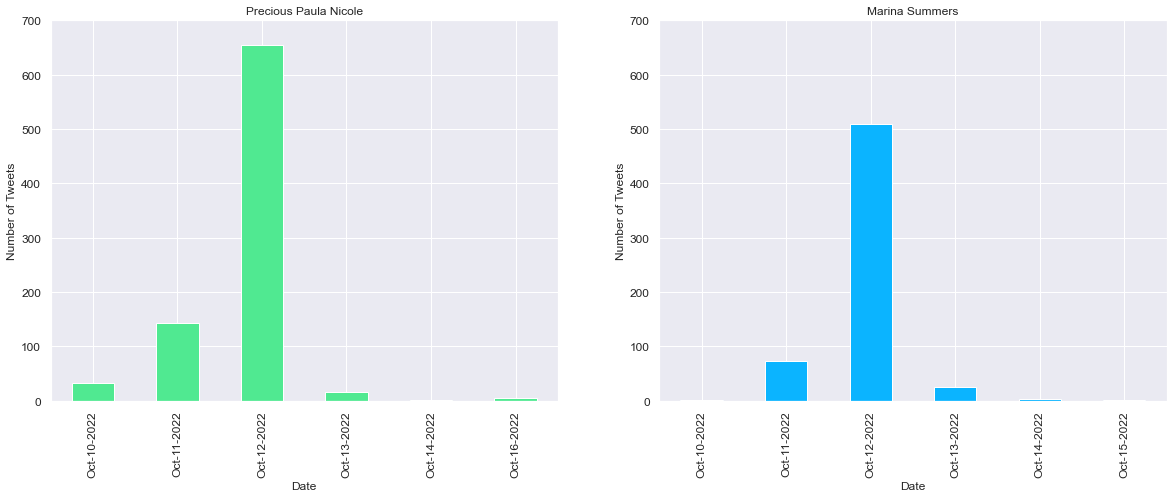

In [75]:
fig = plt.figure(figsize=(20, 7))

ax = fig.add_subplot(1, 2, 1)
ax = PPN_grp_date[['text']].plot(kind="bar", legend=False, fontsize=12, ax=ax, color = "#50e991")
ax.set_ylim(0,700)
ax.set_title('Precious Paula Nicole')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of Tweets", fontsize=12)

ax2 = fig.add_subplot(1, 2, 2)
ax2 = MS_grp_date[['text']].plot(kind="bar", legend=False, fontsize=12, ax=ax2, color = "#0bb4ff")
ax2.set_ylim(0,700)
ax2.set_title('Marina Summers')
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Number of Tweets", fontsize=12)


*In both datasets, the days with the most Tweets were on October 12, 2022. This was expected by the group as that day was the airing of the finale episode of the show. However, upon looking at the datasets and the visualization, both have a missing day. For PPN, October 15, 2022 was missing. For MS, it was October 16, 2022.*

## Are there any Tweets that root for both finalists?

The group has decided to count in each dataset if there were Tweets that supported both finalists.

In [76]:
PPN_nsc = (PPN_nospam.text.str.count("#TeamPreciousPaulaNicole").sum() + 
           PPN_nospam.text.str.count("#teampreciouspaulanicole").sum() + 
           PPN_nospam.text.str.count("#TeamPPN").sum()
           ) #summing

PPN_nsc_MS = (PPN_nospam.text.str.count("#TeamMarinaSummers").sum() + 
              PPN_nospam.text.str.count("#teammarinasummers").sum())#both teams



MS_nsc = (MS_nospam.text.str.count("#TeamMarinaSummers").sum() + 
          MS_nospam.text.str.count("#teammarinasummers").sum() + 
          MS_nospam.text.str.count("#teamMarinaSummers").sum() + 
          MS_nospam.text.str.count("#TEAMMARINASUMMERS").sum()
          ) #summing

MS_nsc_PPN = (MS_nospam.text.str.count("#TeamPreciousPaulaNicole").sum() + 
              MS_nospam.text.str.count("#teampreciouspaulanicole").sum())#both teams


pure_PPN = (PPN_nsc - PPN_nsc_MS)
pure_MS = (MS_nsc - MS_nsc_PPN)
mixed_nospam_count = (PPN_nsc_MS + MS_nsc_PPN)

In [77]:
print("Pure PPN supporters:", pure_PPN)
print("Pure MS supporters:", pure_MS)
print("Mixed supporters:", mixed_nospam_count)

Pure PPN supporters: 749
Pure MS supporters: 565
Mixed supporters: 104


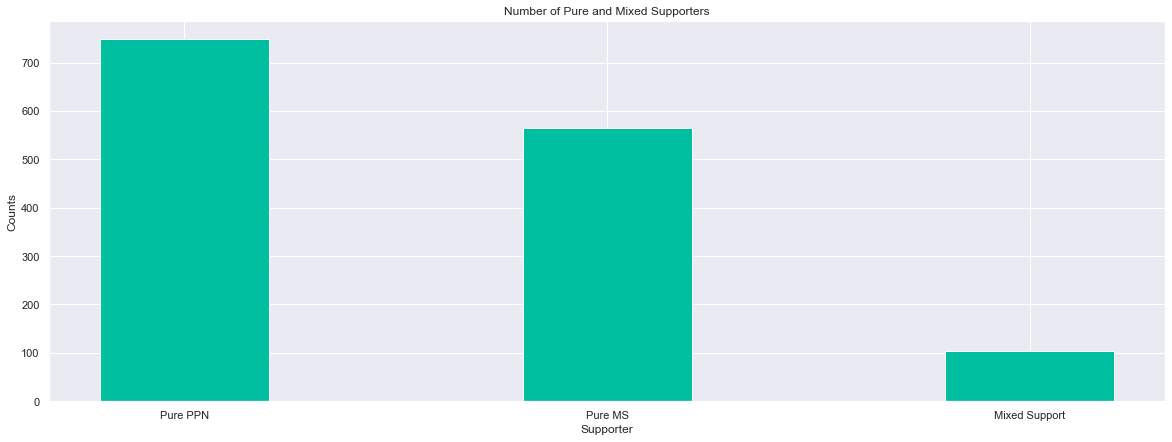

In [78]:
fig = plt.figure(figsize=(20, 7))

data = {'Pure PPN':pure_PPN,
        'Pure MS':pure_MS,
        'Mixed Support':mixed_nospam_count}
support = list(data.keys())
values = list(data.values())

plt.bar(support, values, color ="#00bfa0",
        width = 0.4)
 
plt.xlabel("Supporter")
plt.ylabel("Counts")
plt.title("Number of Pure and Mixed Supporters")
plt.show()

*In the visualization above, it can be observed that there are more loyal PPN fans compared to MS fans. Additionally, there are 104 users whose Tweets support both PPN and MS.*

## What are the most repeated words in the Tweets?

Through word cloud, it is possible to determine the most mentioned words in a tweet. This way, the group can slightly visualize the perception of the audience toward the contestants.

This can be a basis for the group and what the group could use as words to look out for when it comes to the sentiment analysis. 

### **Precious Paula Nicole**

In [79]:
text = " ".join(i for i in PPN_nospam.text).lower()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


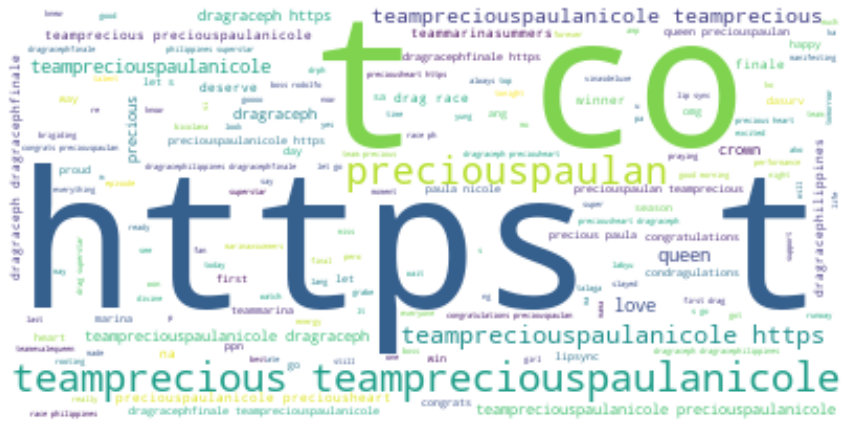

In [80]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The initial result of the word cloud consisted of irrelevant words such as https, t, co, and a series of team names. To clean the word cloud, *stop words* are used to ommit irrelevent words to the cloud.

In [81]:
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

stopwords=["https","t","yes", "co", "teamprecious", "teampreciouspaulanicole", "preciouspaulan", "dragraceph", "preciouspaulanicole", "dragracephilippines", "preciouspaula", "dragracephfinale", "precious paula", "finale", "paula nicole", "precious  paula", "paula  nicole", "drag race", "teammarinasummers", "drag  race", "let", "s", "drph", "teamxilhouette", "season", "na", "race philippines", "tonight"]+list(stopwords)+list(all_stopwords)
print(stopwords)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

['https', 't', 'yes', 'co', 'teamprecious', 'teampreciouspaulanicole', 'preciouspaulan', 'dragraceph', 'preciouspaulanicole', 'dragracephilippines', 'preciouspaula', 'dragracephfinale', 'precious paula', 'finale', 'paula nicole', 'precious  paula', 'paula  nicole', 'drag race', 'teammarinasummers', 'drag  race', 'let', 's', 'drph', 'teamxilhouette', 'season', 'na', 'race philippines', 'tonight', 'cannot', 'how', 'been', "you'd", 'your', 'ought', 'up', 'had', 'further', "isn't", 'is', "wouldn't", 'of', 'between', 'by', 'themselves', 'down', "here's", 'such', 'here', "haven't", 'was', "hasn't", 'under', 'himself', 'off', 'do', "he'll", 'be', 'am', 'we', 'why', 'to', 'and', 'not', "i'm", "shouldn't", 'too', "didn't", 'have', 'its', "she'll", 'against', 'hers', "there's", "when's", "they're", 'shall', 'because', "shan't", "she'd", 'otherwise', 'our', 'most', 'me', 'other', 'com', 'during', 'hence', 'in', 'so', 'get', 'than', 'were', 'about', "don't", 'yourselves', 'with', 'from', 'when', "

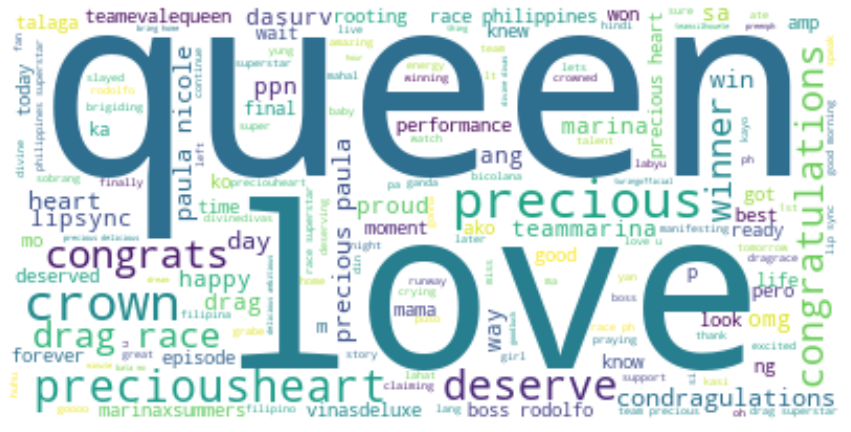

In [82]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud shows that the frequently mentioned words — *queen*, *crown*, *love*, *win*, *winner* from the tweets with **#TeamPreciousPaulaNicole**

### **Marina Summers**

In [83]:
text = " ".join(i for i in MS_nospam.text).lower()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


In [84]:
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

stopwords=["https","t","yes", "co", "dragraceph", "dragracephilippines", "dragracephfinale", "finale", "drag race", "teammarinasummers", "marinaxsummers", "teampreciouspaulanicole", "drag", "teammarina", "marina", "summer", "teamevalequeen", "preciouspaulan", "ppn", "summers", "let", "s", "season"]+list(stopwords)+list(all_stopwords)
print(stopwords)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

['https', 't', 'yes', 'co', 'dragraceph', 'dragracephilippines', 'dragracephfinale', 'finale', 'drag race', 'teammarinasummers', 'marinaxsummers', 'teampreciouspaulanicole', 'drag', 'teammarina', 'marina', 'summer', 'teamevalequeen', 'preciouspaulan', 'ppn', 'summers', 'let', 's', 'season', 'cannot', 'how', 'been', "you'd", 'your', 'ought', 'up', 'had', 'further', "isn't", 'is', "wouldn't", 'of', 'between', 'by', 'themselves', 'down', "here's", 'such', 'here', "haven't", 'was', "hasn't", 'under', 'himself', 'off', 'do', "he'll", 'be', 'am', 'we', 'why', 'to', 'and', 'not', "i'm", "shouldn't", 'too', "didn't", 'have', 'its', "she'll", 'against', 'hers', "there's", "when's", "they're", 'shall', 'because', "shan't", "she'd", 'otherwise', 'our', 'most', 'me', 'other', 'com', 'during', 'hence', 'in', 'so', 'get', 'than', 'were', 'about', "don't", 'yourselves', 'with', 'from', 'when', "we'll", "won't", 'then', 'i', "who's", 'whom', 'this', 'herself', 'on', 'own', "let's", 'these', "you're", 

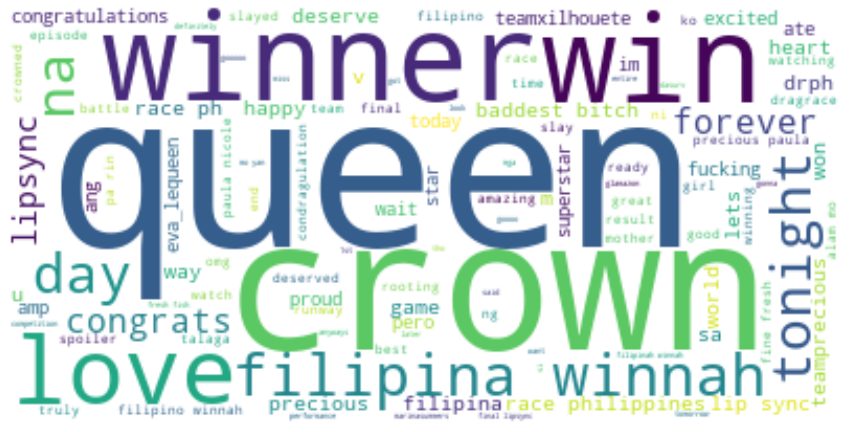

In [85]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Interestingly, the generated word cloud for the tweets with **#TeamMarinaSummers** contains the most mentioned words for tweets with **#TeamPreciousPaulaNicole**. These are *queen*, *crown*, *win*, *winner*, and *love*

# Research Question

#### **Does PPN have a more positive response compared to MS?**

Based on the EDA conducted, the group has noticed that there are more Tweets loyal to Precious Paula Nicole or PPN. However, the group also wants to know if that number of Tweets will show the same amount or more positivity compared to Marina Summers or MS despite the numerical differences.

That being said, the potential data mining method to be done is to conduct a sentiment analysis with the Tweets from the datasets. The importance and significance of this project can potentially show how a person is received by their fans or the general public. Additionally, it can be used in bigger-scaled projects such as marketing firms to study brand or product perception.
